# Convolution Neural Networks (CNNs)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings("ignore")
%matplotlib inline

## Dataset

The full dataset is available [here](https://drive.google.com/file/d/1v2hL8Vz0w0d12HmHWoOL3m2bp75W1R6M/view?usp=sharing).

In [2]:
import tensorflow as tf

tf.__version__

2025-03-04 18:17:22.265754: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


'2.17.0'

In [3]:
SEED = 42
IMAGE_SIZE = (64, 64)
BATCH_SIZE = 32

In [4]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# training set
train_dataset = image_dataset_from_directory(
    "./00_data/dataset/training_set",
    labels="inferred",
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=True,
    validation_split=0.25,
    subset="training",
    seed=SEED
)
# validation set
val_dataset = image_dataset_from_directory(
    "./00_data/dataset/training_set",
    labels="inferred",
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=True,
    validation_split=0.25,
    subset="validation",
    seed=SEED
)
# test set
test_dataset = image_dataset_from_directory(
    "./00_data/dataset/test_set",
    labels="inferred",
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=True
)

Found 8001 files belonging to 2 classes.
Using 6001 files for training.
Found 8001 files belonging to 2 classes.
Using 2000 files for validation.
Found 2001 files belonging to 2 classes.


In [5]:
class_names = train_dataset.class_names
print(f"Classes: {class_names}")

Classes: ['cats', 'dogs']


2025-03-04 18:17:30.940266: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


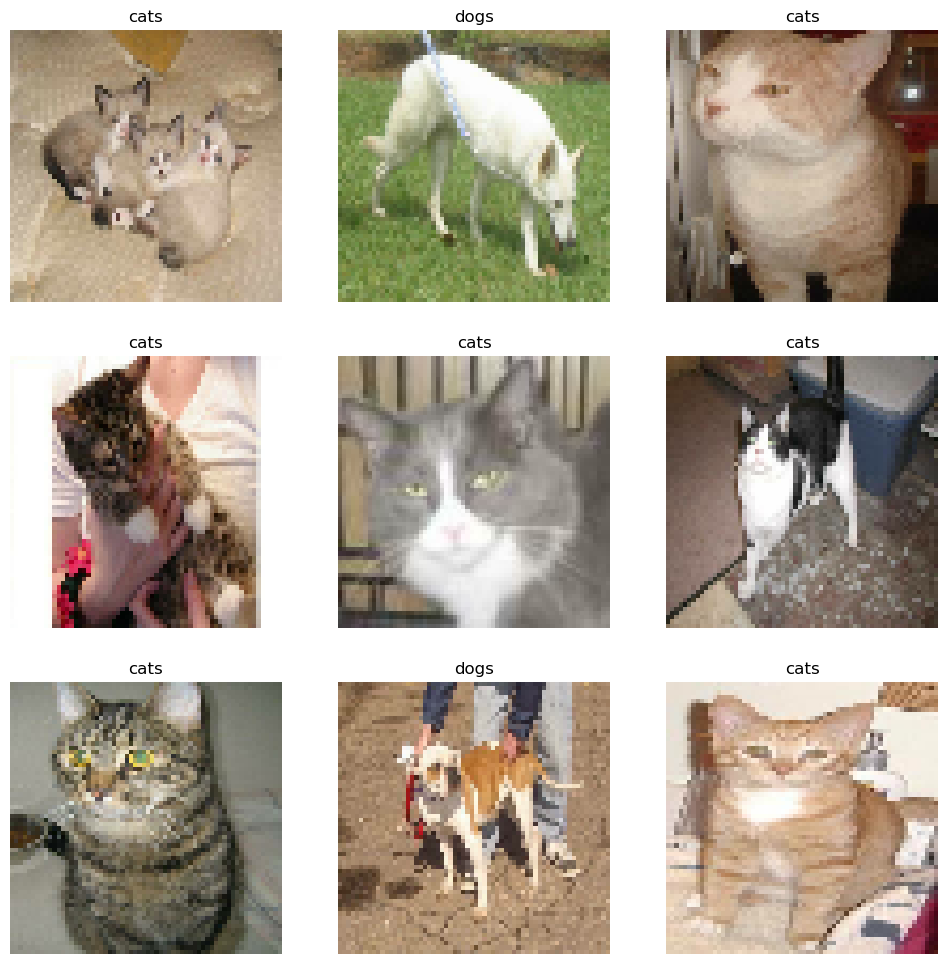

In [6]:
plt.figure(figsize=(12, 12))

for images, labels in train_dataset.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

plt.show()

## Building the CNN

In [7]:
# init CNN
cnn = tf.keras.models.Sequential([
    # data augmentation
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomBrightness(0.2),
    tf.keras.layers.Rescaling(1./255),
    # first conv
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # second conv
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # third conv
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25), # 0.2
    # flattening
    tf.keras.layers.Flatten(),
    # fully connected layer
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
# compiling the CNN
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss="binary_crossentropy", metrics=["accuracy"])

In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000, seed=SEED).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().shuffle(1000, seed=SEED).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# training the CNN
history = cnn.fit(x = train_dataset, validation_data=val_dataset, epochs=50)

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 24s 109ms/step - accuracy: 0.5132 - loss: 0.6984 - val_accuracy: 0.5990 - val_loss: 0.6740
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 108ms/step - accuracy: 0.5948 - loss: 0.6639 - val_accuracy: 0.6540 - val_loss: 0.6338
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 108ms/step - accuracy: 0.6462 - loss: 0.6267 - val_accuracy: 0.6780 - val_loss: 0.6082
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 108ms/step - accuracy: 0.6507 - loss: 0.6199 - val_accuracy: 0.6840 - val_loss: 0.5843
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 108ms/step - accuracy: 0.6812 - loss: 0.5957 - val_accuracy: 0.6640 - val_loss: 0.5956
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 108ms/step - accuracy: 0.6743 - loss: 0.6009 - val_accuracy: 0.6775 - val_loss: 0.5917
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 108ms/step - accuracy: 0.6773 - loss: 0.5972 - val_accuracy: 0.6985 - val_loss: 0.5772
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 108ms/step - accuracy: 0.6942 - loss: 0

In [10]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 64, 64, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast                 │ (None, 64, 64, 3)      │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_brightness               │ (None, 64, 64, 3)      │             0 │
│ (RandomBrightness)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,820,229 (14.57 MB)

 Trainable params: 1,273,409 (4.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,546,820 (9.72 MB)

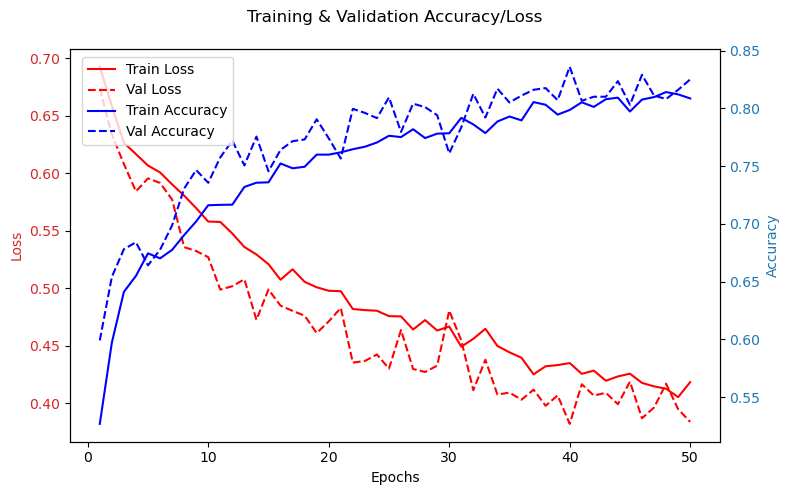

In [11]:
epochs = range(1, len(history.history['loss']) + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(epochs, train_loss, 'r-', label="Train Loss")
ax1.plot(epochs, val_loss, 'r--', label="Val Loss")
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:blue')
ax2.plot(epochs, train_acc, 'b-', label="Train Accuracy")
ax2.plot(epochs, val_acc, 'b--', label="Val Accuracy")
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.suptitle('Training & Validation Accuracy/Loss')
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.show()

In [12]:
loss, accuracy = cnn.evaluate(test_dataset)
print(f"Test Accuracy: {accuracy:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8172 - loss: 0.3784
Test Accuracy: 0.8266


## Prediction

2025-03-04 18:35:02.014697: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


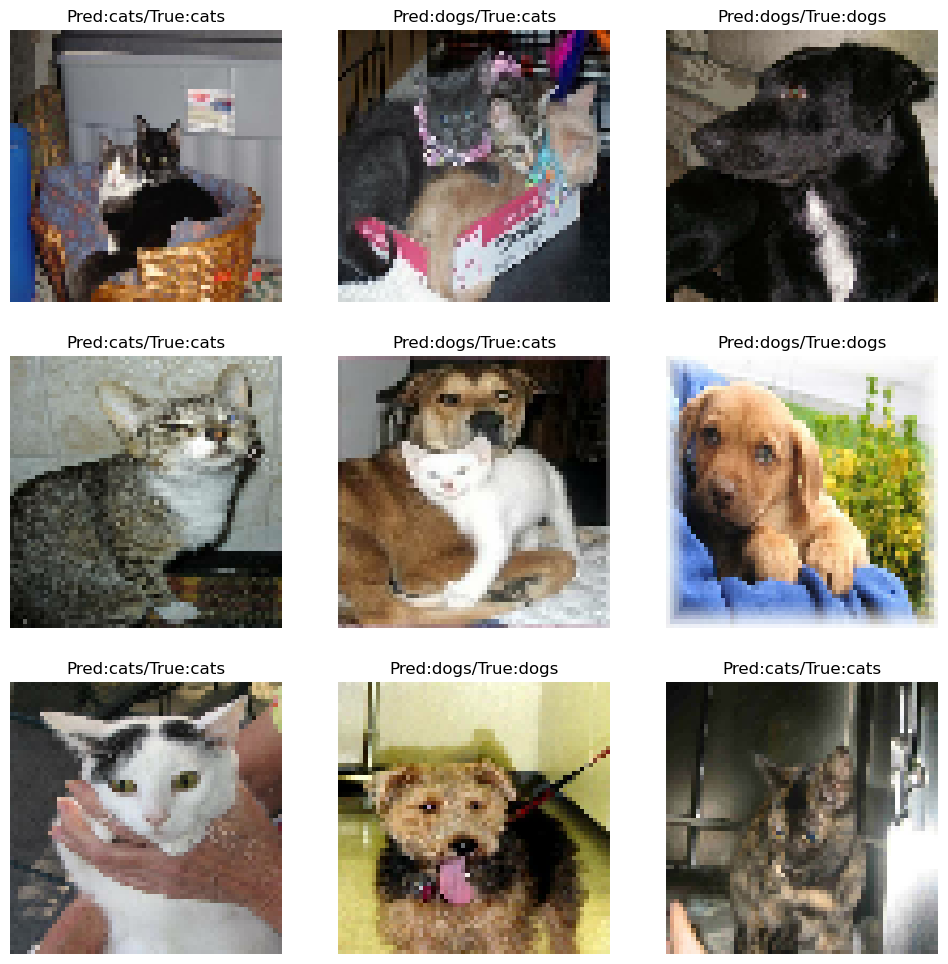

In [13]:
from tensorflow.keras.preprocessing import image

plt.figure(figsize=(12, 12))

for images, labels in train_dataset.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        # prepocess photo
        img_x = tf.expand_dims(images[i], axis=0)  # Добавляем batch dimension
        
        # predict
        result = cnn.predict(img_x, verbose=False)
        prediction = class_names[0 if result[0][0] < 0.5 else 1]
        
        plt.title(f"Pred:{prediction}/True:{class_names[labels[i]]}")
        plt.axis("off")

plt.show()

## Hyperparameters Tuning